# 测试命令
./infer.py -d /media/cyj/DATA/Rangenet++/train/tasks/semantic/dataset -l /media/cyj/DATA/Rangenet++/train/tasks/semantic/prediction -m /media/cyj/DATA/Rangenet++/train/tasks/semantic/pre_trained_model/darknet21


# parser.py
有标签情况 (self.gt 为 True)：当处理带有语义标签的数据时（如训练集或验证集），SemLaserScan 类被用来同时处理点云数据和对应的语义标签。在这种情况下，self.color_map 提供了一种将语义标签映射到颜色的方式，这对于可视化和验证数据非常有用。

无标签情况 (self.gt 为 False)：当仅处理点云数据而不关心语义标签时（如测试集或仅进行点云处理的场景），使用 LaserScan 类而不是 SemLaserScan 类。在这种情况下，不需要 self.color_map，因为没有语义标签要映射到颜色。

proj_argmax 是在二维投影（例如 Range Image）上的语义分割结果，通常用于图像形式的处理。

unproj_argmax 是将 proj_argmax 反投影回三维空间的结果，保持了原始点云的结构和形式。

# 语义分割结果

In [2]:
# 对label文件查看,以00序列的第0帧为例
import numpy as np

# 假设 label_file 是您的标签文件路径
label_file = '../Rangenet++/train/tasks/semantic/prediction/sequences/00/predictions/proj_000000.label'


# 读取二进制文件
labels = np.fromfile(label_file, dtype=np.int32)

print(labels.shape) 
print(labels[10:])

(131072,)
[70 70 70 ... 70 70 48]


In [17]:
# 重塑数组
height, width = 64, 2048

# 重塑数组
labels_reshaped = labels.reshape((height, width))


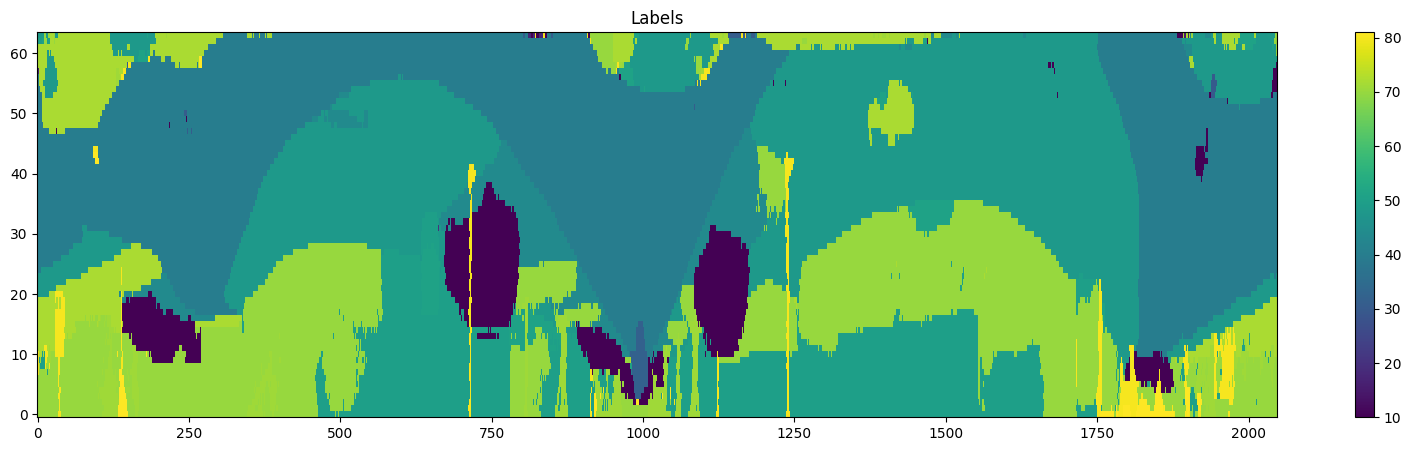

In [18]:
import matplotlib.pyplot as plt

# 可视化标签
plt.figure(figsize=(20, 5))
plt.imshow(labels_reshaped, aspect='auto', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title("Labels")
plt.show()


# 语义分割权重（贡献度）

(131072,)
[1064648049 1064440389 1064922009 ... 1055151587 1050921983 1046932046]


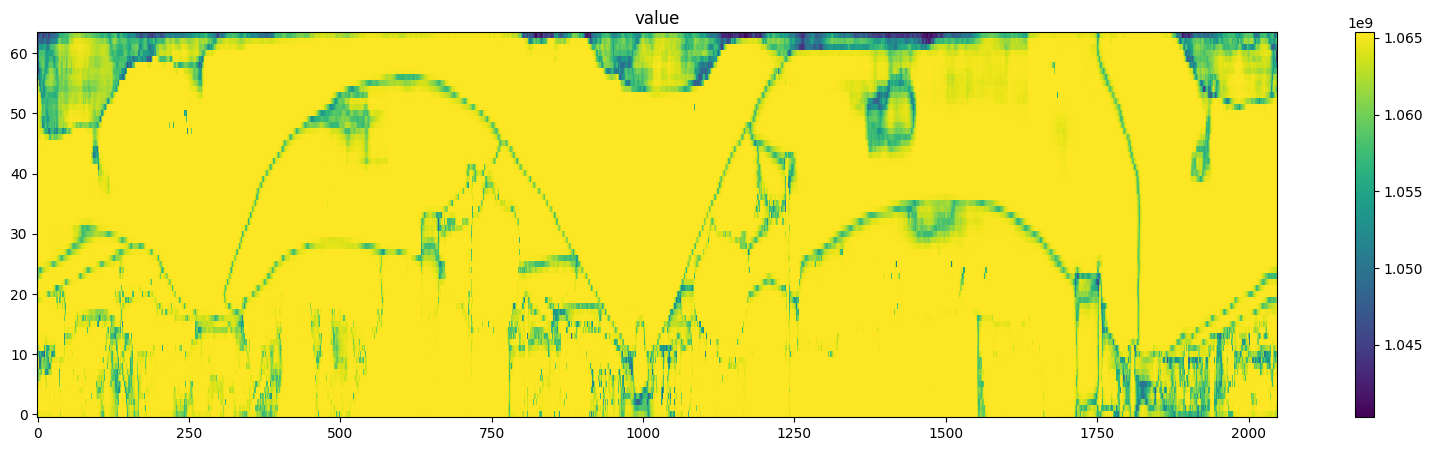

In [25]:
value_file = '../Rangenet++/train/tasks/semantic/prediction/sequences/00/predictions/max_vals000000.label'

# 读取二进制文件
value = np.fromfile(value_file, dtype=np.int32)

print(value.shape) 

print(value[10:])

# 重塑数组
height, width = 64, 2048

# 重塑数组
value_reshaped = value.reshape((height, width))

import matplotlib.pyplot as plt


# 可视化标签
plt.figure(figsize=(20, 5))
plt.imshow(value_reshaped, aspect='auto', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title("value")
plt.show()



# 归一化

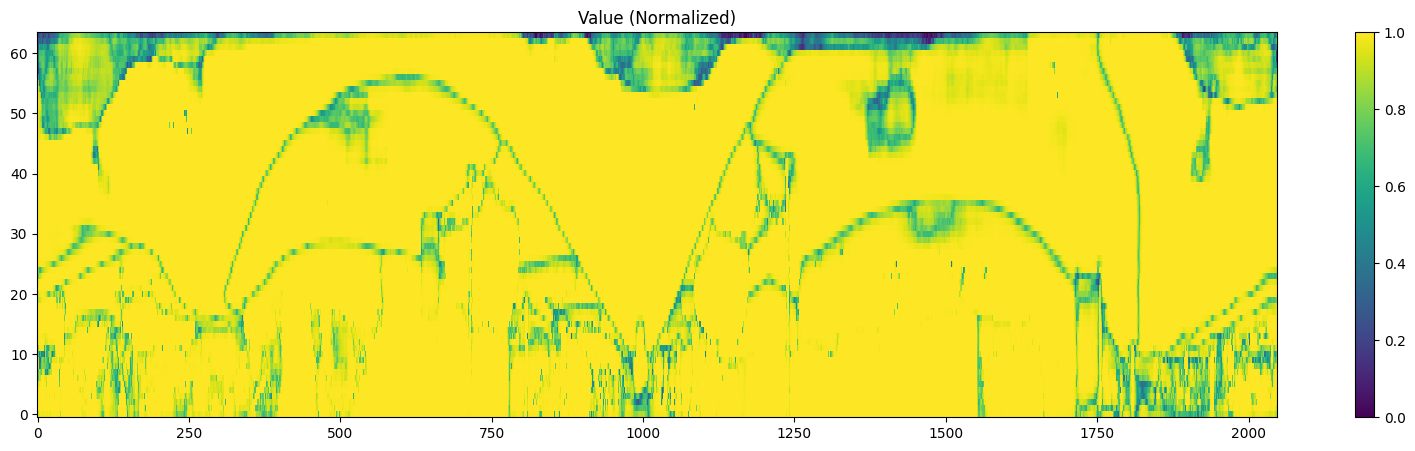

In [28]:
import numpy as np
import matplotlib.pyplot as plt

value_file = '../Rangenet++/train/tasks/semantic/prediction/sequences/00/predictions/max_vals000000.label'

# 读取二进制文件
value = np.fromfile(value_file, dtype=np.int32)

# 归一化数据
value_normalized = (value - np.min(value)) / (np.max(value) - np.min(value))

# 重塑数组
height, width = 64, 2048
value_reshaped = value_normalized.reshape((height, width))

# 可视化标签
plt.figure(figsize=(20, 5))
plt.imshow(value_reshaped, aspect='auto', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title("Value (Normalized)")
plt.show()


# 结论
图中黄色的，就是值比较大的，蓝、绿色值比较小

由此看出物体的主体对于语义分割贡献度更大，边缘，还有可能是天空（物体少）对于语义分割贡献度少

符合认知